### Environnement de travail:
Dans ce projet, J'ai crée mon propre environnement de travail important les bibliothèques: pandas, numpy, matplotlib, seaborn, sys. J'ai aussi importé mon propre module "util" comportant des fonctions que j'ai développé pour assurer l'analyse exploratoire des données.

In [1]:
import my_utilities_module as util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Dataframes implement the Pandas API
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import sys
from scipy import stats

## 1- Analyse exploratoire
- Je vais récupérer le premier chunk afin de déterminer le nombre de colonnes  
- Je vais calculer le nombre de lignes en sommant les lignes de différents chunks  
- Afin de déterminer le nombre total de Nans pour chaque variable, je vais parcourir les différents chunks ensuite:   

1- calculer le pourcentage Nans pour chaque variable  

2- calculer le nombre de lignes pour chaque chunk  

3- sommer le nombre de lignes pour avoir le nombre total des lignes  

4- sommer le pourcentage de Nans de chaque variable pour avoir la valeur totale de valeurs manquantes




In [2]:
reader= pd.read_csv('en.openfoodfacts.org.products.csv',  sep = '\t',chunksize=2000, iterator=True, error_bad_lines=False,low_memory=False)
chunk_sample=reader.get_chunk(50)
print('le nombre de colonnes est :',chunk_sample.shape[1])
pd.set_option('display.max_columns', None)
chunk_sample

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


le nombre de colonnes est : 186


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
#pour avoir une idée générale sur les variables de notre dataframe
util.variable_survey(chunk_sample)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,code,int64,50,0.0 %
1,url,object,50,0.0 %
2,creator,object,5,0.0 %
3,created_t,int64,50,0.0 %
4,created_datetime,object,50,0.0 %
...,...,...,...,...
181,choline_100g,float64,0,100.0 %
182,phylloquinone_100g,float64,0,100.0 %
183,beta-glucan_100g,float64,0,100.0 %
184,inositol_100g,float64,0,100.0 %


In [4]:
#Parcourir les chunks de mon fichier et calculer le nombre de valeurs manquantes et le nombre de lignes totaux dans le df finale
def iterfile (reader):
    nans_values={}
    final_nans_values={}
    nb_lignes=0
    for i,chunk in enumerate (reader):
        nb_lignes+=chunk.shape[0]
        for column in (chunk.columns):
            if(i==0):
                nans_values[column]=[chunk[column].isna().sum()]
            else:
                nans_values[column].append(chunk[column].isna().sum())
    print ('le nombre de lignes est :',nb_lignes)
    for key in nans_values:
        final_nans_values[key]=round(((np.sum(nans_values[key]))/nb_lignes)*100,2)
    return(final_nans_values)

   

In [5]:
final_nans_values=iterfile(reader)
dict(sorted(final_nans_values.items(), key=lambda item: item[1]))

le nombre de lignes est : 1907268


{'code': 0.0,
 'url': 0.0,
 'creator': 0.0,
 'created_t': 0.0,
 'created_datetime': 0.0,
 'last_modified_t': 0.0,
 'last_modified_datetime': 0.0,
 'states': 0.0,
 'states_tags': 0.0,
 'states_en': 0.0,
 'pnns_groups_1': 0.02,
 'pnns_groups_2': 0.02,
 'countries': 0.3,
 'countries_tags': 0.3,
 'countries_en': 0.3,
 'product_name': 4.17,
 'energy_100g': 20.55,
 'proteins_100g': 20.91,
 'fat_100g': 20.97,
 'carbohydrates_100g': 20.99,
 'sugars_100g': 21.83,
 'saturated-fat_100g': 23.22,
 'energy-kcal_100g': 23.29,
 'image_url': 23.92,
 'image_small_url': 23.92,
 'salt_100g': 24.71,
 'sodium_100g': 24.71,
 'brands': 48.5,
 'brands_tags': 48.51,
 'image_nutrition_url': 49.0,
 'image_nutrition_small_url': 49.0,
 'categories': 52.75,
 'categories_tags': 52.75,
 'categories_en': 52.75,
 'main_category': 52.75,
 'main_category_en': 52.75,
 'ingredients_text': 62.88,
 'additives_n': 62.88,
 'ingredients_from_palm_oil_n': 62.88,
 'ingredients_that_may_be_from_palm_oil_n': 62.88,
 'nutriscore_scor

## Conclusion
Nous concluons que:
- le nombre de lignes est : 1907268  
- le nombre de colonnes est : 186
- L'existence de plusieurs colonnes qui contiennent 100% de valeurs manquantes  
- L'existence de plusieurs colonnes qui contiennent un important pourcentage de valeurs manquantes (>85 %)

Je choisi de sélectionner les colonnes qui contiennent moins de 85% des valeurs manquantes. Pour celà, je vais: 

1- Récupérer les noms de ces colonnes  
2- Parcourir mon df via chunks pour ne pas gaspiller trop de RAM et supprimer, au fure et à mesure, ces colonnes  
3- Regouper les chunks une fois les colonnes casi-vides sont supprimées, et former mon df finale.

In [6]:
#afficher les colonnes sélectionnées
selected_columns = [k for k in final_nans_values if final_nans_values[k] < 85]
len(selected_columns)

60

In [7]:
#explorer un échantillon du contenue des colonnes sélectionnées
chunk_sample=chunk_sample[selected_columns]
chunk_sample

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.400,0.5600,NaN
2,31,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Espagne,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,163.9,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.100,0.4400,NaN
4,4622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/pro

In [8]:
# Générer mon df finale après suppression des colonnes inutiles
reader= pd.read_csv('en.openfoodfacts.org.products.csv',  sep = '\t',chunksize=2000, iterator=True, error_bad_lines=False,low_memory=False)
#big_df=pd.DataFrame()
all_chunks = []
for chunk in reader:
    chunk=chunk[selected_columns]
    chunk.dropna(how='all')
    all_chunks.append(chunk)
#print(len(all_chunks))
big_df= pd.concat(all_chunks)
big_df.head

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method NDFrame.head of                        code  \
0         00000000000000225   
1             0000000000017   
2             0000000000031   
3        000000000003327986   
4        000000000004622327   
...                     ...   
1907313       9999999910128   
1907314           999999999   
1907315       9999999990397   
1907316       9999999999994   
1907317     999999999999999   

                                                       url  \
0        http://world-en.openfoodfacts.org/product/0000...   
1        http://world-en.openfoodfacts.org/product/0000...   
2        http://world-en.openfoodfacts.org/product/0000...   
3        http://world-en.openfoodfacts.org/product/0000...   
4        http://world-en.openfoodfacts.org/product/0000...   
...                                                    ...   
1907313  http://world-en.openfoodfacts.org/product/9999...   
1907314  http://world-en.openfoodfacts.org/product/9999...   
1907315  http://world-en.openfoodfacts.

In [9]:
#Afficher les valeurs manquantes dont le seuil de Nans est inférieur à 100% sous forme de heatmap
#util.nans_heatmap(big_df,100)

In [10]:
#test de mémoire utilisée par le df
big_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907318 entries, 0 to 1907317
Data columns (total 60 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   code                                     object 
 1   url                                      object 
 2   creator                                  object 
 3   created_t                                int64  
 4   created_datetime                         object 
 5   last_modified_t                          int64  
 6   last_modified_datetime                   object 
 7   product_name                             object 
 8   quantity                                 object 
 9   packaging                                object 
 10  packaging_tags                           object 
 11  brands                                   object 
 12  brands_tags                              object 
 13  categories                               object 
 14  categories_tags   

#### Remarques:
Une fois mon df finale générée, j'ai remarqué que sa taille est assez importante (7.2 GB) --> Je vais essayer, dans la suite, de la minimiser en  
- Minimisant le nombre de bit pour le stockage de float et integer, en tant que possible. 
- Faire appel au module "Util" pour vérifier le pourcentage de Nans et des valeurs dupliquées. Supprimer les doublons s'ils existent.  

J'ai remarqué d'après le premier chunk que:
- il y a des colonnes inutiles telque celles contenant les liens hypertextes (url). Je vais donc les supprimer
- il y a des colonnes qui contiennent presque les mêmes données et dont le nom contient le terme "tag". Je vais les supprimer.
- il y a des colonnes qui contiennent le même contenu en langue française et anglaise. Je vais supprimer celles qui sonts en anglais, contenant le terme "en"

In [11]:
## diminuer la taille de df en minimisant la taille des variables de type 'float64' et 'int64'
for column in big_df:
    if big_df[column].dtype == 'float64':
        big_df[column]=pd.to_numeric(big_df[column], downcast='float')
    if big_df[column].dtype == 'int64':
        big_df[column]=pd.to_numeric(big_df[column], downcast='integer')

In [12]:
#re-vérifier la taille de df
big_df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907318 entries, 0 to 1907317
Columns: 60 entries, code to nutrition-score-fr_100g
dtypes: float32(17), int32(2), object(41)
memory usage: 7.1 GB


In [13]:
# définir une fonction qui prend en paramètre le df et retourne des statistiques (shape, doublons, nans)
def dataframe_survey(df):
    data_survey=pd.DataFrame(columns=['(rows, column)','Total number of nans','percentage of nans','number of duplicated rows','percentage of duplicated rows'])
    shape='({},{})'.format(str(df.shape[0]),str(df.shape[1]))   
    nans=df.isna().sum().sum()
    per_nans='{} %'.format(  round(  ((df.isna().sum().sum()/df.size).astype(float))*100 ,2) )
    dup_rows=df.duplicated().sum()
    per_dup_rows='{} %'.format(round((df.duplicated().sum())/(df.shape[0]),2))
    new_row={'(rows, column)':shape,
             'Total number of nans': nans,
             'percentage of nans': per_nans,
             'number of duplicated rows':dup_rows,
             'percentage of duplicated rows':per_dup_rows}
    data_survey=data_survey.append(new_row, ignore_index=True)
    return data_survey

In [14]:
dataframe_survey(big_df)

,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,"(1907318,60)",46651567,40.77 %,1,0.0 %


In [15]:
# Supprimer la ligne dupliquée
big_df.drop_duplicates(subset =None, keep = 'first', inplace = True)

In [16]:
#vérifier si la ligne dupliquée a été bien supprimée
dataframe_survey(big_df)

,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,"(1907317,60)",46651524,40.77 %,0,0.0 %


In [17]:
term_to_delete=['url','tags','en']
for term in term_to_delete:
    big_df = big_df.drop(big_df.filter(regex=term).columns, axis=1)
    print('done!')

done!
done!
done!


In [18]:
dataframe_survey(big_df)

,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,"(1907317,35)",25451452,38.13 %,0,0.0 %


In [19]:
big_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907317 entries, 0 to 1907317
Columns: 35 entries, code to nutrition-score-fr_100g
dtypes: float32(14), int32(2), object(19)
memory usage: 2.8 GB


#### Remarque:
Nous remarquons , après cette opération que:  
- le pourcentage de Nans a bien diminué de 40,77% --> 38.13%  
- le nombre de colonnes a diminué de 60 --> 35 colonnes  
- la taille du df a diminué de 7.1 GB --> 2.8 GB

Ceci facilitera la restriction de variables utiles pour mon application. Ce choix sera sujette de la section suivante.

In [20]:
# Vérifier les valeurs distinctes de chaque variable afin d'étudier ceux qui peuvent être de type catégorie. Pour celà, je vais faire appel à la fonction "variable survey" du module "util"

#afficher et étudier les variables de type "object"
#df_description = big_df.sel
#changer le type de quelques colonnes de "object" vers "category"
#for col in ['creator', 'brands', 'categories', 'stores','countries','nutriscore_grade','pnns_groups_1','pnns_groups_2','states','brand_owner','ecoscore_grade_fr','main_category']:
   # big_df[col] = big_df[col].astype('category')

##### 2- Conception de l'application "GreenFood"
- Dans l'objectif d'encourager le consommateur d'acheter des produits qui ont moins d'impact négatif sur l'environnement et au même temps qui sont bien pour notre corps, je propose une application qui permet de proposer d'autres produits au consommateur, ayant le même nutriscore, mais protégeant mieux notre environnement ainsi que notre santé.  
- Consommer d'une manière bio, ou plutôt éthique, est l'objectif de mon application que je nommerai "GreenFood". 


- Le principe de l'application est le suivant: 

**1-** Le consommateur choisi un produit et scane son code-à-barre  
**2-** GreenFood détecte le scoreGrade du produit  
**3-** GreenFood récupère tous les produits sous la même catégorie et ayant le même nutriscoreGrade  
**4-** Une comparaison est établie entre l'ecoScore-Grade et NOVA Group du produit sélectionné et ceux des autres produits récupérés. Ainsi, GreenFood propose au consommateurs des produits de même catégorie et de même nutriscore , mais ayant un ecoScore et appartenant à un NOVA Group meilleur.

Dans ce but, les variable utiles pour notre application sont: {code,product_name, packaging, categories, nutriscore_score, nutriscore_grade, nova_group, ecoscore_score_fr, ecoscore_grade_fr}
il faut tout d'abord vérifier la qualité des variables utiles pour notre application. Pour celà, il faut vérifier:  
**1-** si le nutriscore-Grade correspond au nutriscrore-score
**2-** si l'ecoscore_score correspond au ecoscore_grade
**3** si la qualité de "packaging" correspond vraiment à la catégorie d'ecoscore_grade affecté.
**4** s'il y a des outliers/ valeurs aberrates


In [21]:
app_columns=['code','product_name', 'categories', 'nutriscore_score', 'nutriscore_grade', 'nova_group','additives_n', 'ecoscore_score_fr', 'ecoscore_grade_fr']
new_big_df=big_df[app_columns]
new_big_df.head(10)

,code,product_name,categories,nutriscore_score,nutriscore_grade,nova_group,additives_n,ecoscore_score_fr,ecoscore_grade_fr
0,00000000000000225,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000100,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",18.0,d,NaN,0.0,55.0,c
6,00000000001111111111,Sfiudwx,Xsf,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3- Analyse univariée:  
Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement:  
- Analyser la distribution des données qualitatives
- Tester la normalité des données quantitatives (est-ce qu'ils suivent ou non une distribution normale/gaussienne). Pour celà je vais utiliser trois méthodes:  
   - la fonction "distplot" de seaborn qui permet non seulement de visualiser l'histogramme d'un échantillon, mais aussi d'estimer la distribution dont l'échantillon est issu.  
   - la méthode quantile-quantile  
- Description statistique des variables quantitatives: la fonction "boxplot" de Pandas pour identifier les valeurs extrêmes et de comprendre la répartition des observations.

   - Je vais aussi définir une méthode "find_anomalies(data)" qui calcue et affiche les outliers. Ces valeurs sont celles qui dépassent/inférieur à 3*STD du surface de l'histogramme d'une data. 


In [22]:
#vérifier les types de variables dans notre nouveau dataset
new_big_df.dtypes.value_counts()

object     5
float32    4
dtype: int64

<AxesSubplot:ylabel='None'>

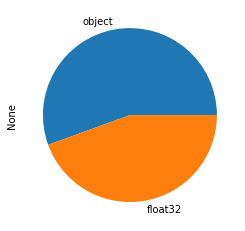

In [23]:
new_big_df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

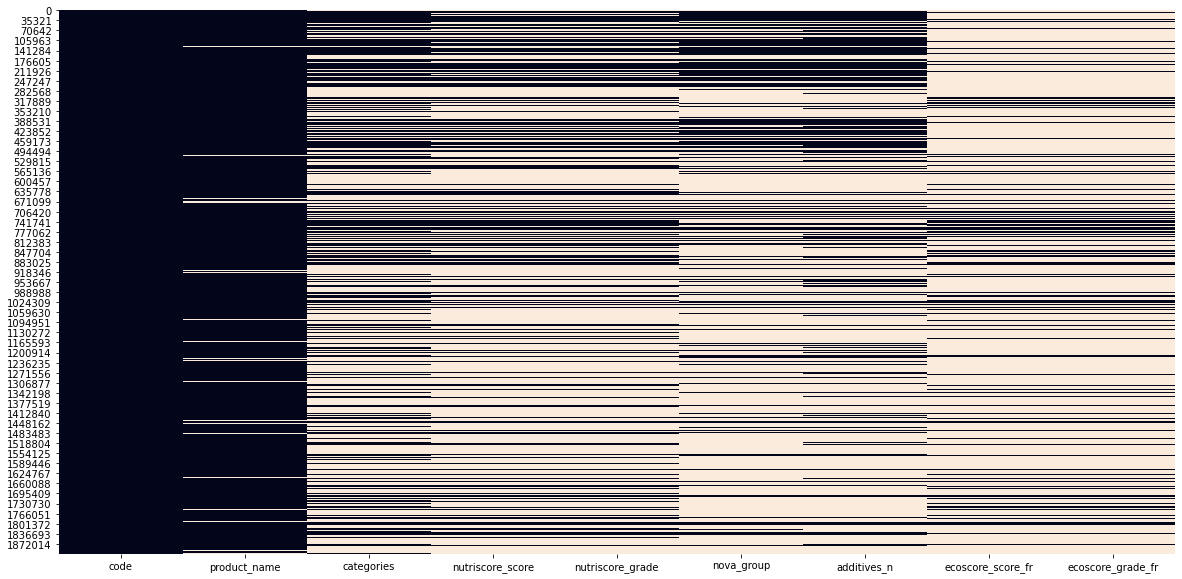

In [24]:
#vérifier les valeurs manquantes dans notre nouveau dataset
plt.figure(figsize=(20,10))
sns.heatmap(new_big_df.isna(), cbar=False)

In [25]:
util.variable_survey(new_big_df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,code,object,1906913,0.0 %
1,product_name,object,1192378,4.17 %
2,categories,object,103646,52.75 %
3,nutriscore_score,float32,56,63.36 %
4,nutriscore_grade,object,5,63.36 %
5,nova_group,float32,4,67.57 %
6,additives_n,float32,40,62.88 %
7,ecoscore_score_fr,float32,149,75.84 %
8,ecoscore_grade_fr,object,5,75.84 %


### 3.1  Examen des  colonnes de type Objects

In [26]:
new_big_df['categories'].value_counts()
new_big_df['categories'].unique().tolist()

[nan,
 'Epicerie, Condiments, Sauces, Moutardes',
 'Xsf',
 "Pâte d'amende",
 'Plats préparés, Légumes préparés, Carottes râpées, Carottes râpées assaisonnées',
 'Tartes, Tartes sucrées, Tartes à la noix de coco',
 "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Desserts, Aliments à base de fruits et de légumes, Fruits et produits dérivés, Compotes, Compotes de poire",
 'Viandes, Volailles, Poulets, Aiguillettes de poulet',
 'Plats préparés, Légumes préparés, Entrées, Entrées froides, Macédoines de légumes',
 'Aliments et boissons à base de végétaux, Boissons, Boissons à base de végétaux, Jus et nectars',
 'Produits laitiers, Produits fermentés, Produits laitiers fermentés, Fromages, Fromages de France, Abondance',
 'Viandes, Volailles, Poulets, Cuisses de poulet',
 "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Céréales et pommes de terre, Pains, Pains spéciaux, Pains Bagel",
 "Aliments et boissons à base de végétaux, Aliments d'origine vé

Text(0.5, 1.0, 'Classement des 10 categories les plus présents')

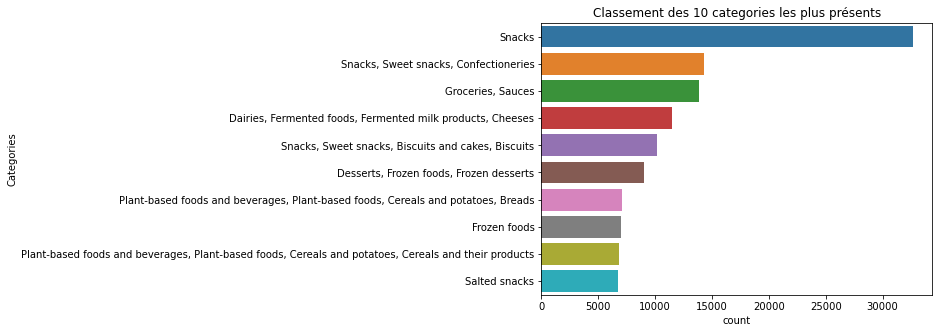

In [27]:
plt.figure(figsize=(7, 5))
sns.countplot(y="categories", data=new_big_df, order=pd.value_counts(new_big_df['categories']).iloc[:10].index)
plt.ylabel("Categories")
plt.title("Classement des 10 categories les plus présents")

In [28]:
new_big_df['nutriscore_grade'].value_counts(normalize=True)

d    0.311417
c    0.214493
e    0.184248
a    0.160379
b    0.129463
Name: nutriscore_grade, dtype: float64

In [29]:
new_big_df['ecoscore_grade_fr'].value_counts()

d    154211
b    123676
e     83665
c     81594
a     17580
Name: ecoscore_grade_fr, dtype: int64

In [30]:
print(new_big_df.ecoscore_grade_fr.count())

460726


In [ ]:
#visulisation de la répartition des valeurs de différents variables
#for col in new_big_df.select_dtypes('object'):
    #plt.figure()
    #new_big_df[col].value_counts().plot.pie()

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(y="product_name", data=new_big_df, order=pd.value_counts(new_big_df['product_name']).iloc[:10].index)
plt.ylabel("Produits")
plt.title("Classement des 10 produits les plus présents")

### Remarques:
**1-** D'après le heatmap-nans, on remarque que les lignes contenants des valeurs manquantes de nutriscrore_grade sont eux même contenant des valeurs manquantes de nutriscore_score. Reste à vérifier si le nutriscore-grade correspond vraiment au nutriscore-score.  
**2-** D'après le heatmap-nans, on remarque que les lignes contenants des valeurs manquantes de ecoscrore_grade sont eux même contenant des valeurs manquantes de ecoscore_score. Reste à vérifier si l'ecoscore-grade correspond vraiment à l'écoscore-score.  
**3-** Il y a beaucoup de redondance et de non normalité dans les noms  de catégories --> il faut les standardiser et créer un dictionnaire --> formater ces chaines de caractères.  
**4-** 'ecoscore_grade_fr' et 'nutriscore_grade' ne contiennent que 5 valeurs distinctes --> il sera possible de transformer leur type de 'object' vers 'category' --> diminuer davantage la taille du dataframe.


### 3.2 Distribution des variables quantitatives

In [ ]:
for col in new_big_df.select_dtypes('float32'):
    plt.figure()
    sns.distplot(new_big_df[col])

In [ ]:
new_big_df['additives_n'].value_counts(normalize=True)

In [ ]:
# définir une fonction qui permet de détecter les anomalies pour une variable
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    print ('std = ',random_data_std)
    random_data_mean = np.mean(data)
    print('mean = ', random_data_mean)
    anomaly_cut_off = random_data_std * 3
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print('lower_limit : ', lower_limit)
    print('upper_limit : ', upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    print ('\nLe nombre total des valeurs est : ',  data.count())
    print ('Le pourcentage des valeurs aberrantes est : ', round((len(anomalies)/ data.count())*100,2), '%')
    print ('Le nombre des valeurs outliers est : ',len(anomalies), '. Ils sont : ')
    return anomalies


In [ ]:
find_anomalies(new_big_df.nutriscore_score)

In [ ]:
find_anomalies(new_big_df.ecoscore_score_fr)

In [ ]:
find_anomalies(new_big_df.additives_n)

In [ ]:
plt.figure(figsize=(20,10))
boxplot = new_big_df.boxplot(column=['nutriscore_score','ecoscore_score_fr','additives_n' ])


In [ ]:
qqplot(big_df.ecoscore_score_fr, line='s')
plt.show()

In [ ]:
qqplot(big_df.additives_n, line='s')
plt.show()

### Remarques:  
**1-** La variable "nova_group" n'a que 4 valeurs possibles --> c'est plut tôt une variable de type catégorie et non pas float --> Il faut changer son type  

**2-** Les variables 'nutriscore_score','additives_n' et 'ecoscore_score' ne suivent pas une distribution normale. Ceci peut être dû à:  
- un échantillon de très grande taille,  
- présence de outliers ou sont constatés des mélanges de distributions  
- Valeurs non normalisés --> distribution asymétrique  

**3-** Si on suppose que les valeurs aberrantes sont celles hors de l'intervalle [moy-3*STD , moy+3*STD], alors nous constatons que le pourcentage des valeurs aberrantes des variables:  
   - nutriscore_score:  0.01 %
   - ecoscore_score_fr: 0.06 %  
   
**-->** Les pourcentages de présence des outliers est négligeable, il vaut mieux supprimer les lignes qui les contiennent.

## 4- Analyse bivariée  
- En premier lieu, je vais essayer de diviser la variable nutriscore_grade en cinque sous-ensembles dépendamment des cinque catégorie présentes. Ensuite, il faut visualiser la relation entre nutriscore-grade et nutriscore-score.  

- En deuxième lieu, je vais essayer de diviser la variable ecoscore_grade en cinque sous-ensembles dépendamment des cinque catégorie présentes. Ensuite, je vais visualiser la relation entre ecoscore-grade et ecoscore-score.  


In [ ]:
#Création de cinq sous-ensembles de nutriscore-grade
df_nutriscore_A= new_big_df[new_big_df['nutriscore_grade']=='a']
df_nutriscore_B= new_big_df[new_big_df['nutriscore_grade']=='b']
df_nutriscore_C= new_big_df[new_big_df['nutriscore_grade']=='c']
df_nutriscore_D= new_big_df[new_big_df['nutriscore_grade']=='d']
df_nutriscore_E= new_big_df[new_big_df['nutriscore_grade']=='e']

### 4.1. Visualisation de relations nutriscore_grade / nutriscore_score

In [ ]:
print(new_big_df.columns)


In [ ]:
col='nutriscore_score'
plt.figure(figsize=(20,10))
sns.distplot(df_nutriscore_A[col], label='nutriscore_A')
sns.distplot(df_nutriscore_B[col], label='nutriscore_B')
sns.distplot(df_nutriscore_C[col], label='nutriscore_C')
sns.distplot(df_nutriscore_D[col], label='nutriscore_D')
sns.distplot(df_nutriscore_E[col], label='nutriscore_E')
plt.legend()

In [ ]:
# Tester la présence des outliers dans les différents sous-ensembles
find_anomalies(df_nutriscore_A.nutriscore_score)

In [ ]:
find_anomalies(df_nutriscore_B.nutriscore_score)

In [ ]:
find_anomalies(df_nutriscore_C.nutriscore_score)

In [ ]:
find_anomalies(df_nutriscore_D.nutriscore_score)

In [ ]:
find_anomalies(df_nutriscore_E.nutriscore_score)

### Remarques
 D'après ce graphe, on remarque qu'il y a, dans certaines cas, pour la même valeur de nutriscore_score, il est affecté deux nutri-score_grade différents. 

### 4.2. Visualisation de relations ecoscore_grade / ecoscore_score

In [ ]:
#Création de cinq sous-ensembles d'ecoscore-grade
df_ecoscore_A= new_big_df[new_big_df['ecoscore_grade_fr']=='a']
df_ecoscore_B= new_big_df[new_big_df['ecoscore_grade_fr']=='b']
df_ecoscore_C= new_big_df[new_big_df['ecoscore_grade_fr']=='c']
df_ecoscore_D= new_big_df[new_big_df['ecoscore_grade_fr']=='d']
df_ecoscore_E= new_big_df[new_big_df['ecoscore_grade_fr']=='e']

In [ ]:
col='ecoscore_score_fr'
plt.figure(figsize=(20,10))
sns.distplot(df_ecoscore_A[col], label='ecoscore_A')
sns.distplot(df_ecoscore_B[col], label='ecoscore_B')
sns.distplot(df_ecoscore_C[col], label='ecoscore_C')
sns.distplot(df_ecoscore_D[col], label='ecoscore_D')
sns.distplot(df_ecoscore_E[col], label='ecoscore_E')
plt.legend()

In [ ]:
find_anomalies(df_ecoscore_A.ecoscore_score_fr)

In [ ]:
find_anomalies(df_ecoscore_B.ecoscore_score_fr)

In [ ]:
find_anomalies(df_ecoscore_C.ecoscore_score_fr)

In [ ]:
find_anomalies(df_ecoscore_D.ecoscore_score_fr)

In [ ]:
find_anomalies(df_ecoscore_E.ecoscore_score_fr)

### Remarque:
D'après ce graphe, on remarque que "ecoscore-score" correspond généralement à l'ecoscore_grade , à l'exception de quelques cas pour des valeurs qui normalement doivent être classées sous ecoscore_A mais ils sont catégorisées sous ecoscore_B.

### Visualisation des relations entre  additives_n/ variables qualitatives.
### var_quantitative/ var_qualitatives

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x='additives_n', hue='nutriscore_grade', data=new_big_df)

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x='additives_n', hue='ecoscore_grade_fr', data=new_big_df)

In [ ]:
new_big_df.columns

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x='additives_n', hue='nova_group', data=new_big_df)

#### Remarques: 
**1-** D'après ce graphe, on remarque que plus le nombre d'additifs augmente, moins  qu'on note l'apparition de nutriscore-grades. --> y a une faible relation entre 'additives_n' et 'ecoscore_grade'. Pareil pour 'nutriscore_grade'.  
**2-**  D'après la visualisation de la relation additives_n/NOVA_group, on remarque qu'il y a une relation assez forte entre la classe 4 d'ANOVA et le nombre d'additifs ajoutés. En tenant compte des outliers trouvé, on met comme hypothèse qu'il existe une relation forte de dépendance entre ces deux données une fois les valeurs aberrantes sont nettoyées --> hypothèse à vérifier  


### Visualisation des relations entre var_qualitative/ var_qualitative


In [ ]:
# relation entre ecoscore_grade/nutriscore_grade. Visualisation du croisement entre les différentes catégories
new_big_df.columns

In [ ]:
plt.figure
sns.heatmap(pd.crosstab(new_big_df['nutriscore_grade'], new_big_df['ecoscore_grade_fr']),annot=True, fmt='d')

In [ ]:
plt.figure
sns.heatmap(pd.crosstab(new_big_df['nutriscore_grade'], new_big_df['nova_group']),annot=True, fmt='d')

In [ ]:
plt.figure
sns.heatmap(pd.crosstab(new_big_df['ecoscore_grade_fr'], new_big_df['nova_group']),annot=True, fmt='d')

### Remarques:
- On remarque qu'il y de nombreux articles qui sont à la fois sous la classe D d'écoscore_grade et sous la classe D de nutriscore_grade et aussi la classe 4 de nova_group


### Analyse multi-variée entre variables

In [ ]:
sns.pairplot(new_big_df)

In [ ]:
sns.heatmap(new_big_df.corr())
#sns.clustermap(new_big_df.corr())